In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
data = {
    'Date': pd.date_range(start='2023-01-01', periods=10, freq='D').tolist() * 5,
    'Company': ['Facebook'] * 10 + ['Amazon'] * 10 + ['Apple'] * 10 + ['Netflix'] * 10 + ['Google'] * 10,
    'Open': [150 + i for i in range(10)] * 5,
    'Close': [151 + i for i in range(10)] * 5,
    'Volume': [1000000 + i*5000 for i in range(10)] * 5
}

df = pd.DataFrame(data)
df.head()


,Date,Company,Open,Close,Volume
0,2023-01-01,Facebook,150,151,1000000
1,2023-01-02,Facebook,151,152,1005000
2,2023-01-03,Facebook,152,153,1010000
3,2023-01-04,Facebook,153,154,1015000
4,2023-01-05,Facebook,154,155,1020000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     50 non-null     datetime64[ns]
 1   Company  50 non-null     object        
 2   Open     50 non-null     int64         
 3   Close    50 non-null     int64         
 4   Volume   50 non-null     int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 2.1+ KB


What is the shape of the dataset, and which companies are included

In [10]:
df.shape
df['Company'].unique()

array(['Facebook', 'Amazon', 'Apple', 'Netflix', 'Google'], dtype=object)

**For each company, find the day when the stock had the highest trading volume.**

In [11]:
df.head()

,Date,Company,Open,Close,Volume
0,2023-01-01,Facebook,150,151,1000000
1,2023-01-02,Facebook,151,152,1005000
2,2023-01-03,Facebook,152,153,1010000
3,2023-01-04,Facebook,153,154,1015000
4,2023-01-05,Facebook,154,155,1020000


In [19]:
df.loc[df.groupby('Company')['Volume'].idxmax()]

,Date,Company,Open,Close,Volume
19,2023-01-10,Amazon,159,160,1045000
29,2023-01-10,Apple,159,160,1045000
9,2023-01-10,Facebook,159,160,1045000
49,2023-01-10,Google,159,160,1045000
39,2023-01-10,Netflix,159,160,1045000


**Which company had the highest average closing price?**

In [22]:
df.groupby('Company')['Close'].mean()

,Close
Company,
Amazon,155.5
Apple,155.5
Facebook,155.5
Google,155.5
Netflix,155.5


**Which company had the largest single-day price change (Close - Open)?**

In [23]:
df.head()

,Date,Company,Open,Close,Volume
0,2023-01-01,Facebook,150,151,1000000
1,2023-01-02,Facebook,151,152,1005000
2,2023-01-03,Facebook,152,153,1010000
3,2023-01-04,Facebook,153,154,1015000
4,2023-01-05,Facebook,154,155,1020000


In [35]:
df['Price_Change'] = df['Close'] - df['Open']
df.head()

,Date,Company,Open,Close,Volume,Price_Change
0,2023-01-01,Facebook,150,151,1000000,1
1,2023-01-02,Facebook,151,152,1005000,1
2,2023-01-03,Facebook,152,153,1010000,1
3,2023-01-04,Facebook,153,154,1015000,1
4,2023-01-05,Facebook,154,155,1020000,1


In [36]:
df.loc[df.groupby('Company')['Price_Change'].idxmax()]

,Date,Company,Open,Close,Volume,Price_Change
10,2023-01-01,Amazon,150,151,1000000,1
20,2023-01-01,Apple,150,151,1000000,1
0,2023-01-01,Facebook,150,151,1000000,1
40,2023-01-01,Google,150,151,1000000,1
30,2023-01-01,Netflix,150,151,1000000,1


**Q7: Which company had the highest average daily price change overall?**

In [39]:
df.groupby('Company')['Price_Change'].mean().idxmax()

'Amazon'

**Find the top 5 days (across all companies) with the highest single-day price increase.**

In [42]:
df.sort_values('Price_Change', ascending=False).head(5)

,Date,Company,Open,Close,Volume,Price_Change
0,2023-01-01,Facebook,150,151,1000000,1
1,2023-01-02,Facebook,151,152,1005000,1
2,2023-01-03,Facebook,152,153,1010000,1
3,2023-01-04,Facebook,153,154,1015000,1
4,2023-01-05,Facebook,154,155,1020000,1


**Which company had the most volatile stock based on the standard deviation of the Price_Change?**

In [45]:
df.groupby('Company')['Price_Change'].std().idxmax()

'Amazon'

**Which company had the lowest average trading volume?**

In [46]:
df.groupby('Company')['Volume'].mean().idxmin()

'Amazon'

**➡️ Add a new column 'Rolling_Avg_3' that shows the 3-day rolling average of the Close price for each company.**

In [51]:
df['Rolling_Avg_3'] = df.groupby('Company')['Close'].rolling(window=3).mean().reset_index(level=0, drop=True)
df.head()

,Date,Company,Open,Close,Volume,Price_Change,Rolling_Avg_3
0,2023-01-01,Facebook,150,151,1000000,1,NaN
1,2023-01-02,Facebook,151,152,1005000,1,NaN
2,2023-01-03,Facebook,152,153,1010000,1,152.0
3,2023-01-04,Facebook,153,154,1015000,1,153.0
4,2023-01-05,Facebook,154,155,1020000,1,154.0


**Find the day with the highest 3-day rolling average of the Close price for each company.**

In [52]:
df.loc[df.groupby('Company')['Rolling_Avg_3'].idxmax()]

,Date,Company,Open,Close,Volume,Price_Change,Rolling_Avg_3
19,2023-01-10,Amazon,159,160,1045000,1,159.0
29,2023-01-10,Apple,159,160,1045000,1,159.0
9,2023-01-10,Facebook,159,160,1045000,1,159.0
49,2023-01-10,Google,159,160,1045000,1,159.0
39,2023-01-10,Netflix,159,160,1045000,1,159.0


**Find the date on which each company had the lowest closing price."
Then return only the following columns:

Company

Date

Close**

In [55]:
df.loc[df.groupby('Company')['Close'].idxmin()][['Company', 'Date', 'Close']]

,Company,Date,Close
10,Amazon,2023-01-01,151
20,Apple,2023-01-01,151
0,Facebook,2023-01-01,151
40,Google,2023-01-01,151
30,Netflix,2023-01-01,151


**Find the company with the highest total trading volume**

In [57]:
df.groupby('Company')['Volume'].sum().idxmax()

'Amazon'

**Find the average Open and Close price for each Company**

In [58]:
df.groupby('Company')[['Open', 'Close']].mean()

,Open,Close
Company,,
Amazon,154.5,155.5
Apple,154.5,155.5
Facebook,154.5,155.5
Google,154.5,155.5
Netflix,154.5,155.5


**Which company has the highest average trading volume?**

In [59]:
df.groupby('Company')['Volume'].mean().idxmax()

'Amazon'

**Plot the closing price trend over time for each company using a line plot.**

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

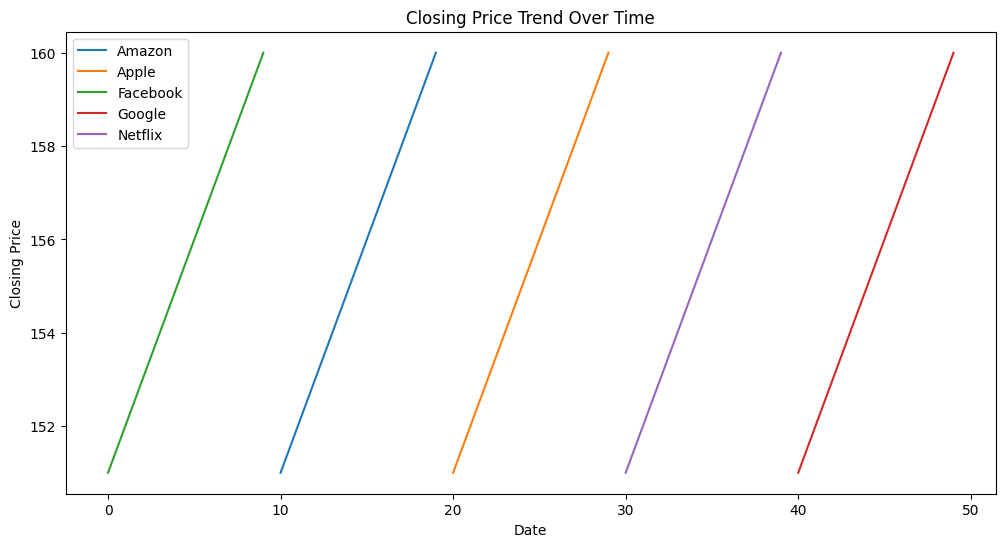

In [68]:
df.groupby('Company')['Close'].plot(figsize=(12, 6))
plt.title('Closing Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt

**Create a bar plot showing the average Close price for each Company.**

Text(0, 0.5, 'Average Close Price')

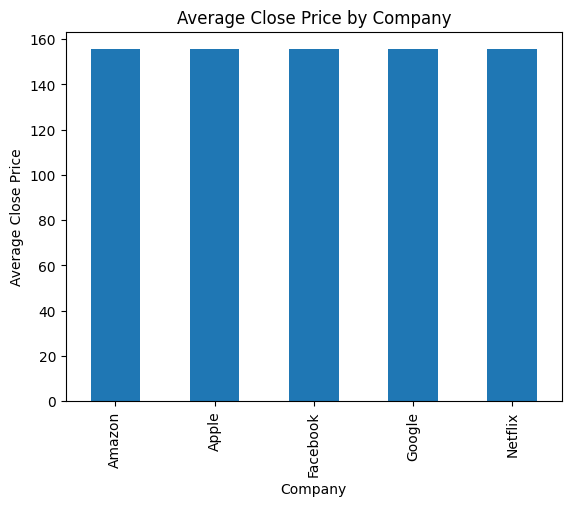

In [72]:
g = df.groupby('Company')['Close'].mean().plot(kind='bar')
plt.title('Average Close Price by Company')
plt.xlabel('Company')
plt.ylabel('Average Close Price')

**Plot a line chart showing the trend of Close prices over time for each company, using Seaborn.
Make sure the Date column is on the X-axis and the Close price on the Y-axis. Each company should have a different colored line.**

Text(0, 0.5, 'Close Price')

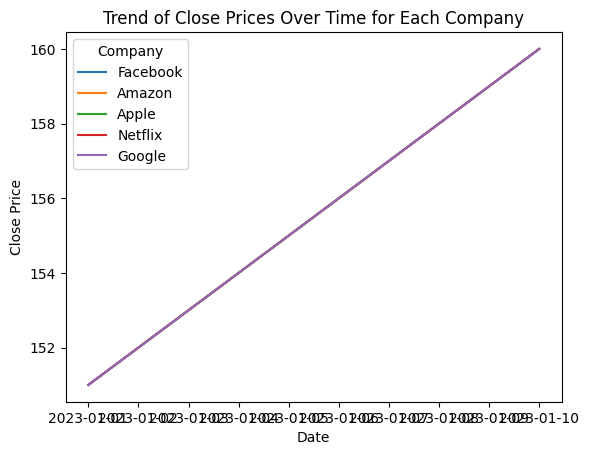

In [76]:
sea.lineplot(data=df, x='Date',y='Close',hue='Company')
plt.title('Trend of Close Prices Over Time for Each Company')
plt.xlabel('Date')
plt.ylabel('Close Price')

**Plot a boxplot of Close prices for each company.**

<Axes: xlabel='Company', ylabel='Close'>

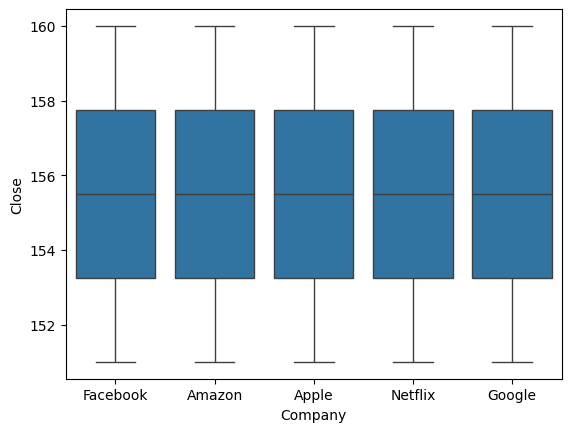

In [77]:
sea.boxplot(x='Company', y='Close', data=df)

**Use Seaborn to draw a KDE (density) plot of the Close price for each company.**

<Axes: xlabel='Close', ylabel='Density'>

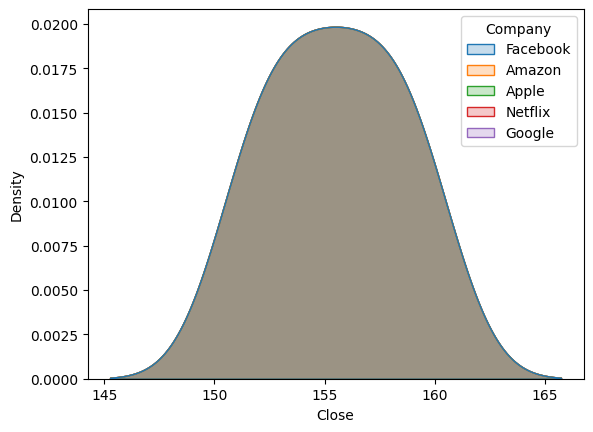

In [78]:
sea.kdeplot(data=df, x='Close', hue='Company', fill=True)

**Draw a violin plot to visualize the distribution of Volume for each company.**

<Axes: xlabel='Company', ylabel='Volume'>

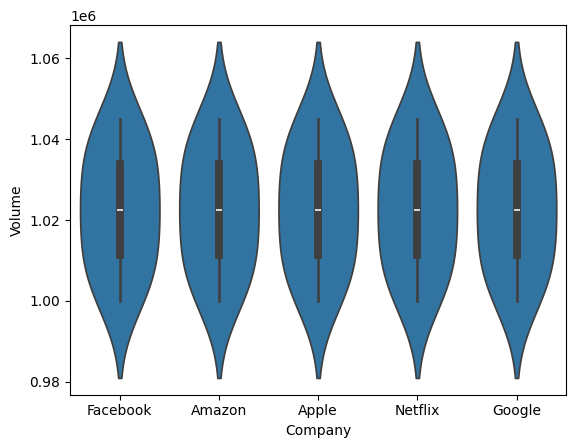

In [79]:
sea.violinplot(x='Company', y='Volume', data=df)

**Use Seaborn's countplot to show how many entries (rows) there are for each company.**

<Axes: xlabel='Company', ylabel='count'>

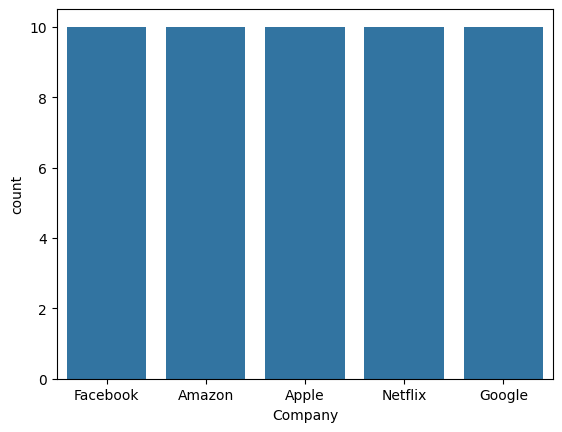

In [80]:
sea.countplot(x='Company', data=df)